In [1]:
%env ASTERIA=/home/jakob/software/ASTERIA/ASTERIA

from asteria.simulation import Simulation
from plthelper import *
from bootstapping import *

env: ASTERIA=/home/jakob/software/ASTERIA/ASTERIA


In [2]:
add_wls = True
detector_scope = "Gen2"

trials = 10000
repetitions = 100

samples = 1000000

distance = 15*u.kpc
frequency =80*u.Hz # 50 Hz and 400 Hz, in steps of 50 Hz
amplitude = 0.2 # 1% and 50% in log steps (1%, 2%, 5%, 10%, 20%, 50%)
time_start = 150*u.ms
time_end = 300*u.ms
position = "center"

sim_dt = 1 * u.ms
res_dt = 1 * u.ms
time_win = [0, 0.35] * u.s # time independent
freq_res = 1 * u.Hz 
freq_win = [75, 1E6] * u.Hz # freq independent
hanning = False

temp_para = {"frequency": frequency, 
             "amplitude": amplitude, #in percent of max value
             "time_start": time_start,
             "time_end": time_end,
             "position": position}

mode = "FFT"

fft_para = {"time_res": res_dt, 
             "time_win": time_win,
             "freq_res": time_start,
             "freq_win": freq_win,
             "hanning": hanning}


ana_para = {"distance": distance,
            "res_dt": res_dt,
            "temp_para": temp_para,
            "mode": mode,
            "ft_para": fft_para}

model = {'name': 'Sukhbold_2015',
         'param':{
             'progenitor_mass': 27*u.Msun, 
             'eos': 'LS220'}
        }

sim = Simulation(model=model,
                 distance=10*u.kpc, 
                 res_dt=res_dt,
                 Emin=0*u.MeV, Emax=100*u.MeV, dE=1*u.MeV,
                 tmin=0.000*u.s, tmax=1*u.s, dt=sim_dt,
                 hierarchy = 'normal',
                 mixing_scheme = 'NoTransformation',
                 detector_scope = detector_scope,
                 add_wls = add_wls)
sim.run()

In [3]:
boot = Bootstrapping(sim, ana_para=ana_para, verbose=True)
boot.load_data("./files/bootstrapping/bootstrapping_generate_1e+06_distance_15kpc.npz")

BOOTSTRAPPING
Detector: ic86


100%|██████████| 500/500 [00:09<00:00, 50.38it/s]


Detector: gen2


100%|██████████| 500/500 [00:11<00:00, 43.55it/s]


Detector: wls


100%|██████████| 500/500 [00:11<00:00, 44.26it/s]


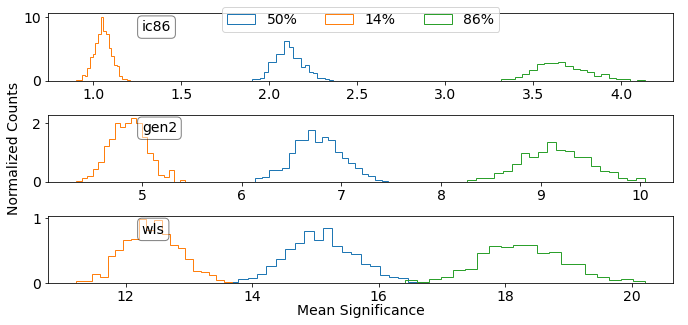

In [5]:
boot.run(trials=1000, repetitions=500, mode = "load")
plot_bootstrap(boot.zscore)

BOOTSTRAPPING
Detector: ic86


100%|██████████| 500/500 [00:39<00:00, 12.52it/s]


Detector: gen2


100%|██████████| 500/500 [00:46<00:00, 10.77it/s]


Detector: wls


100%|██████████| 500/500 [00:45<00:00, 10.99it/s]


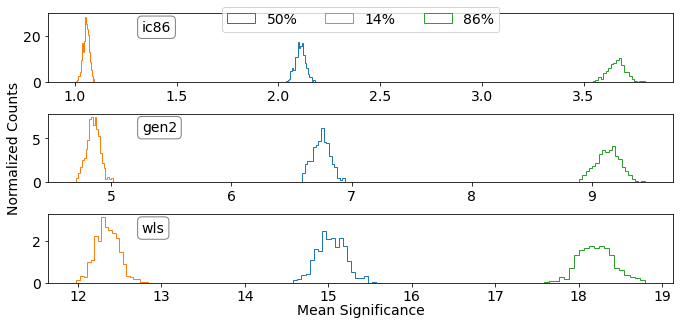

In [4]:
boot.run(trials=10000, repetitions=500, mode = "generate")
plot_bootstrap(boot.zscore)

BOOTSTRAPPING
Detector: ic86


100%|██████████| 500/500 [06:04<00:00,  1.37it/s]


Detector: gen2


100%|██████████| 500/500 [07:00<00:00,  1.19it/s]


Detector: wls


100%|██████████| 500/500 [06:53<00:00,  1.21it/s]


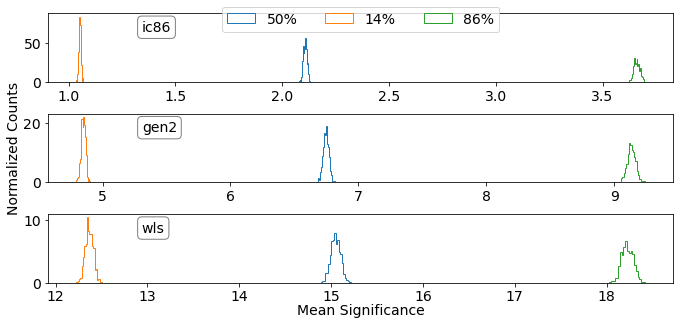

In [5]:
boot.run(trials=100000, repetitions=500, mode = "generate")
plot_bootstrap(boot.zscore)

REALDEAL
Detector: ic86


100%|██████████| 500/500 [00:00<00:00, 1382.07it/s]


Detector: gen2


100%|██████████| 500/500 [00:00<00:00, 1394.11it/s]


Detector: wls


100%|██████████| 500/500 [00:00<00:00, 1372.22it/s]


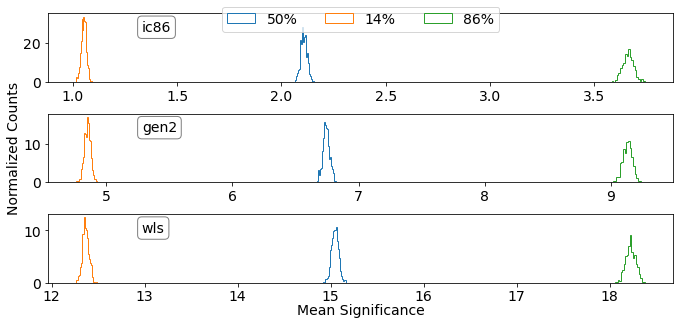

In [5]:
boot.realdeal(trials=10000, repetitions=500)
plot_bootstrap(boot.zscore)